#### Importing Libraries

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go

In [57]:
from sklearn.model_selection import train_test_split # Dividir los datos
from sklearn.linear_model import LogisticRegression # Modelo de regresion  logistica
from sklearn.tree import DecisionTreeClassifier # Modelo de arbol de decision
from sklearn.ensemble import RandomForestClassifier # Modelo Random Forest
from sklearn.naive_bayes import GaussianNB # Modelo classificación bayesiana
from sklearn.neighbors import KNeighborsClassifier # Modelo KNN
from sklearn.cluster import KMeans # Modelo Kmeans
from sklearn.svm import SVC # Máquina de vectores de soporte
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix # Metricas de evaluavión y reporting
from sklearn.preprocessing import LabelEncoder # Codificar etiquetas (preprocesado)
from sklearn.model_selection import cross_val_score # Validación cruzada
from sklearn.cluster import AgglomerativeClustering, DBSCAN
from sklearn import metrics


##### Carga de datos

In [3]:
df = pd.read_csv('data/Train.csv')
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


### Data Analysis (EDA)

##### Datos

In [5]:
# Info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [7]:
# Describe
df.describe()

,ID,Age,Work_Experience,Family_Size
count,8068.000000,8068.000000,7239.000000,7733.000000
mean,463479.214551,43.466906,2.641663,2.850123
std,2595.381232,16.711696,3.406763,1.531413
min,458982.000000,18.000000,0.000000,1.000000
25%,461240.750000,30.000000,0.000000,2.000000
50%,463472.500000,40.000000,1.000000,3.000000
75%,465744.250000,53.000000,4.000000,4.000000
max,467974.000000,89.000000,14.000000,9.000000


In [10]:
print(f'El documento tiene {df.shape[0]} filas y {df.shape[1]} columnas')

El documento tiene 8068 filas y 11 columnas


In [11]:
# Ver los nulos
df.isnull().sum()

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

In [12]:
# Eliminar por completo los nulos
df= df.dropna()

##### Gráficos

C:\Users\POMPAS\AppData\Local\Temp\ipykernel_20936\1045834615.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[x] , bins = 20)
C:\Users\POMPAS\AppData\Local\Temp\ipykernel_20936\1045834615.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[x] , bins = 20)
C:\Users\POMPAS\AppData\Local\

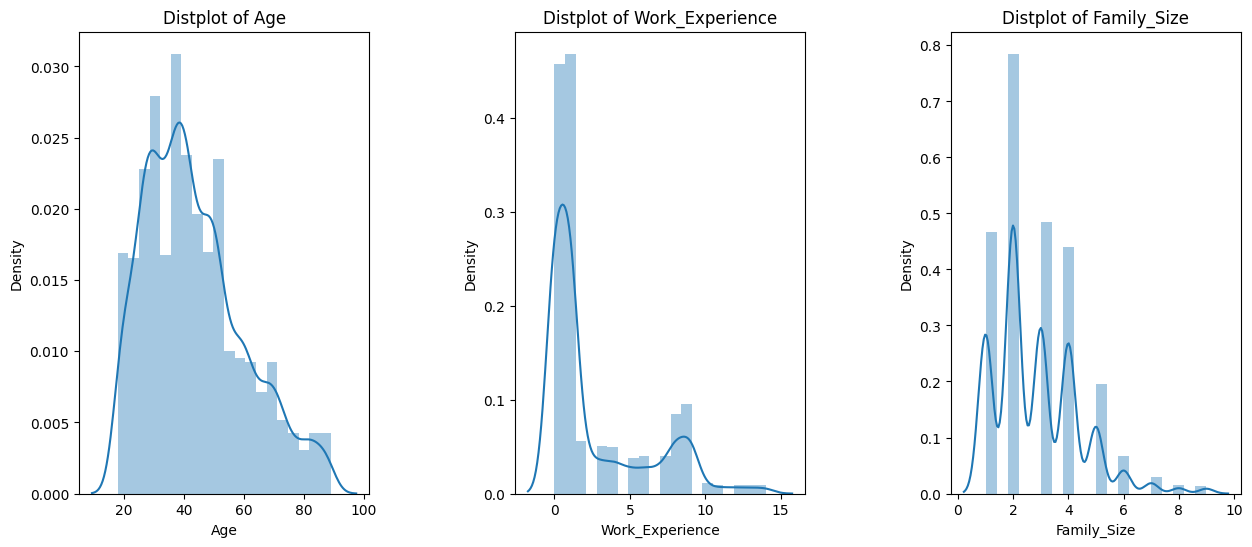

In [14]:
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['Age' , 'Work_Experience' , 'Family_Size']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(df[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()

In [15]:
# Ver la media de cada segmentación
df.groupby('Segmentation')[[ 'Age','Work_Experience','Family_Size', 'Var_1']].agg('mean')

C:\Users\POMPAS\AppData\Local\Temp\ipykernel_20936\2392269056.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Segmentation')[[ 'Age','Work_Experience','Family_Size', 'Var_1']].agg('mean')


,Age,Work_Experience,Family_Size
Segmentation,,,
A,44.421411,2.888614,2.431931
B,48.113232,2.393766,2.682570
C,49.327907,2.224419,2.961628
D,32.956744,2.997154,3.241320


C:\Users\POMPAS\AppData\Local\Temp\ipykernel_20936\2290217046.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Segmentation')[[ 'Age','Work_Experience','Family_Size', 'Var_1']].agg('mean').plot(kind = 'bar')


<Axes: xlabel='Segmentation'>

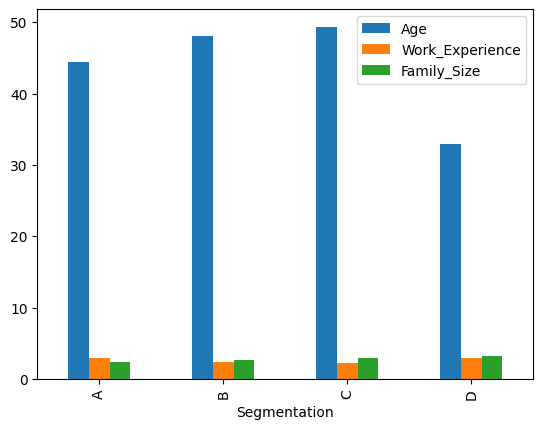

In [16]:
df.groupby('Segmentation')[[ 'Age','Work_Experience','Family_Size', 'Var_1']].agg('mean').plot(kind = 'bar')

In [20]:
df.groupby('Gender')[['Age','Work_Experience','Family_Size']].agg('mean')

,Age,Work_Experience,Family_Size
Gender,,,
Female,43.146252,2.826640,2.742972
Male,43.852869,2.468589,2.920859


<Axes: xlabel='Gender'>

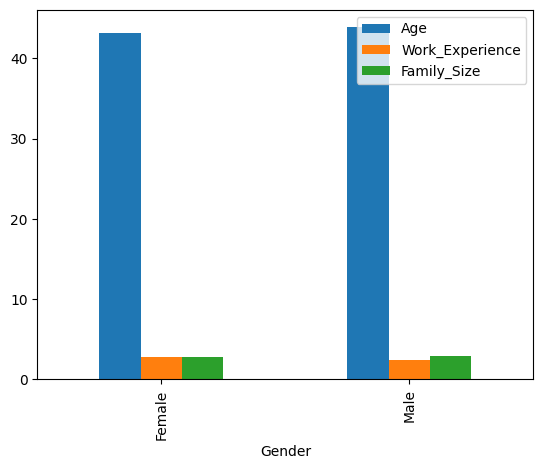

In [21]:

df.groupby('Gender')[['Age','Work_Experience','Family_Size']].agg('mean').plot(kind = 'bar')

In [22]:
# we will check for profession by gender
df.groupby(['Profession','Gender'])[['Gender']].count()

Gender
Profession    Gender        
Artist        Female    1055
              Male      1137
Doctor        Female     257
              Male       335
Engineer      Female     466
              Male       116
Entertainment Female     214
              Male       595
Executive     Female      22
              Male       483
Healthcare    Female     446
              Male       631
Homemaker     Female     144
              Male        31
Lawyer        Female     256
              Male       244
Marketing     Female     128
              Male       105

<Axes: ylabel='Profession,Gender'>

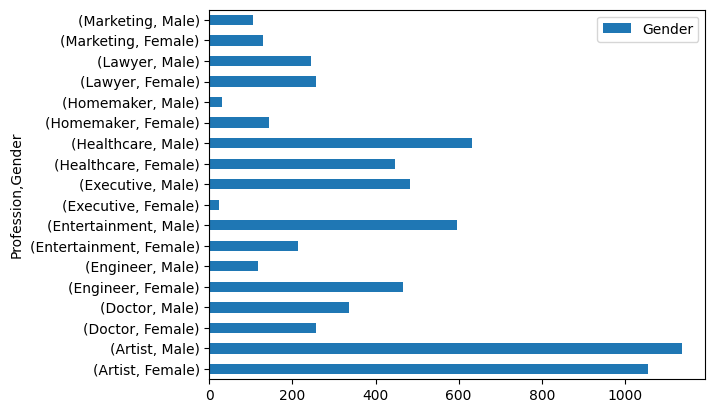

In [26]:
df.groupby(['Profession','Gender'])[['Gender']].count().plot(kind= 'barh')

In [24]:
df.groupby(['Gender','Spending_Score'])[['Spending_Score']].count()

Spending_Score
Gender Spending_Score                
Female Average                    692
       High                       393
       Low                       1903
Male   Average                    970
       High                       611
       Low                       2096

<Axes: ylabel='Gender,Spending_Score'>

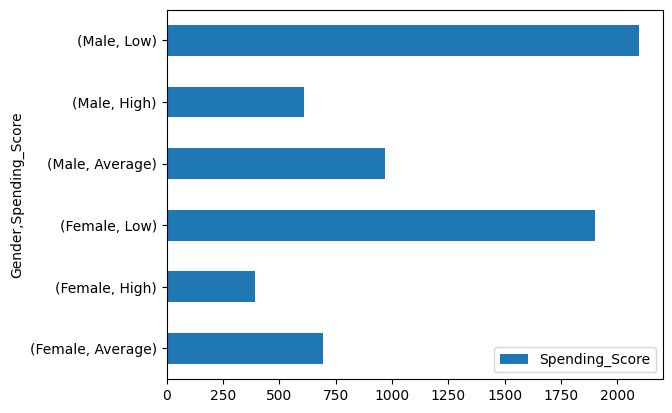

In [25]:
df.groupby(['Gender','Spending_Score'])[['Spending_Score']].count().plot(kind = 'barh')

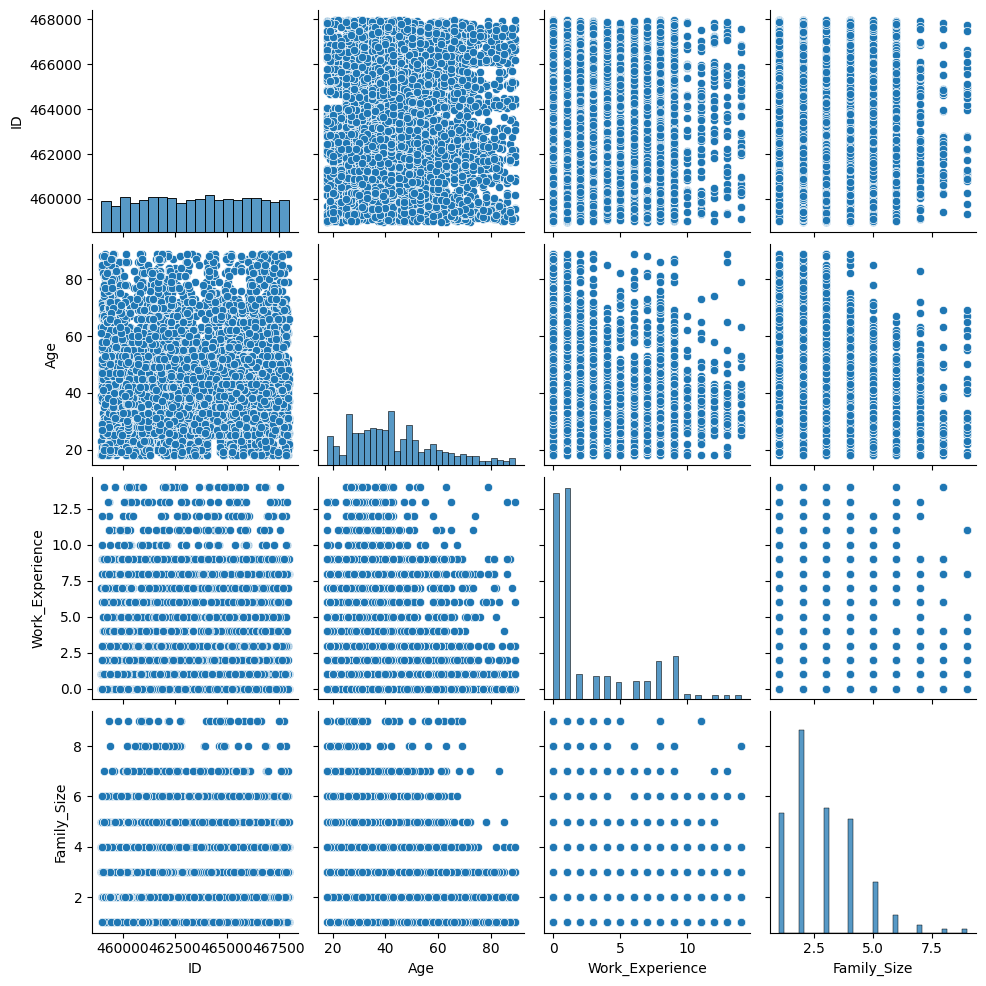

In [27]:
sns.pairplot(df)

C:\Users\POMPAS\AppData\Local\Temp\ipykernel_20936\3756501338.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot = True)


<Axes: >

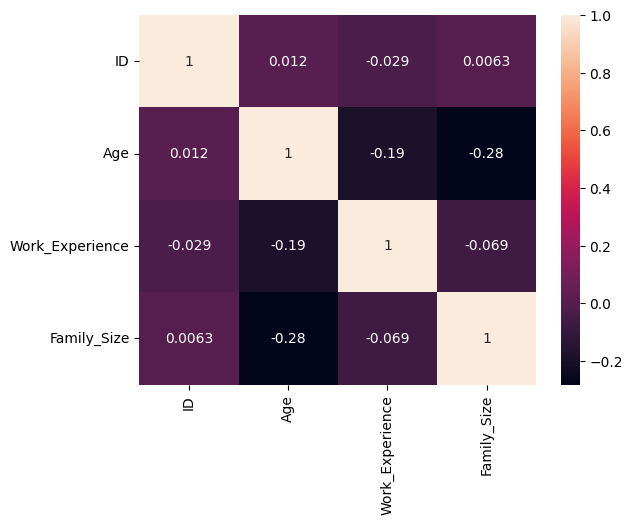

In [28]:
# Ver la correlación
sns.heatmap(df.corr(),annot = True)

### Modelos

#### Preprocesado


In [29]:
# Hacer dummis para obtener las variables categóricas a numéricas
var = ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score', 'Var_1']
df_dummies = pd.get_dummies(df,columns=var)
print(df_dummies.columns.tolist())

['ID', 'Age', 'Work_Experience', 'Family_Size', 'Segmentation', 'Gender_Female', 'Gender_Male', 'Ever_Married_No', 'Ever_Married_Yes', 'Graduated_No', 'Graduated_Yes', 'Profession_Artist', 'Profession_Doctor', 'Profession_Engineer', 'Profession_Entertainment', 'Profession_Executive', 'Profession_Healthcare', 'Profession_Homemaker', 'Profession_Lawyer', 'Profession_Marketing', 'Spending_Score_Average', 'Spending_Score_High', 'Spending_Score_Low', 'Var_1_Cat_1', 'Var_1_Cat_2', 'Var_1_Cat_3', 'Var_1_Cat_4', 'Var_1_Cat_5', 'Var_1_Cat_6', 'Var_1_Cat_7']


In [30]:
# Para la variable objetivo realizaremos un LabelEncoding 
le = LabelEncoder()
df_dummies['Segmentation'] = le.fit_transform(df_dummies['Segmentation'])

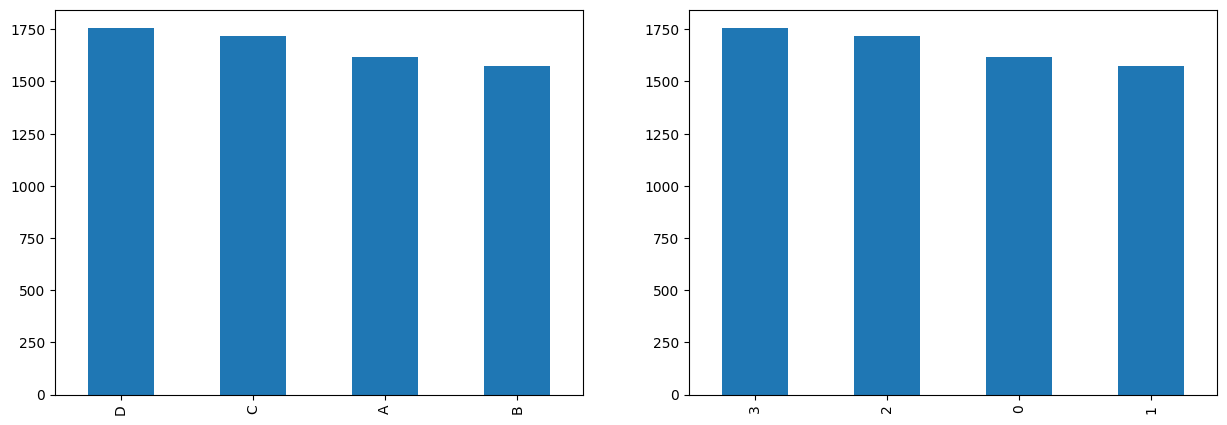

In [31]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
df['Segmentation'].value_counts().plot(kind = 'bar')
plt.subplot(1,2,2)
df_dummies['Segmentation'].value_counts().plot(kind = 'bar')
plt.show()

__Dividimos los datos en train y test__

In [51]:
X = df_dummies.drop(['Segmentation','ID'],axis = 1)
y = df_dummies['Segmentation']

#### Modelos supervisados

In [50]:
def train_and_evaluate_models(X, y):
    # Crear una lista de modelos con sus nombres
    models = [
        ('Logistic Regression', LogisticRegression()),
        ('Decision Tree', DecisionTreeClassifier()),
        ('Random Forest', RandomForestClassifier()),
        ('Naive Bayes', GaussianNB()),
        ('K-Nearest Neighbors', KNeighborsClassifier()),
        ('Support Vector Machine', SVC())
    ]
    
    # Crear una lista para almacenar los resultados
    results = []
    
    # Iterar sobre cada modelo
    for model_name, model in models:
        # Dividir los datos en conjuntos de entrenamiento y prueba
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        
        # Entrenar el modelo
        model.fit(X_train, y_train)
        
        # Realizar predicciones en el conjunto de prueba
        y_pred = model.predict(X_test)
        
        # Calcular la precisión del modelo
        accuracy = accuracy_score(y_test, y_pred)
        
        # Agregar el resultado a la lista
        results.append((model_name, accuracy))
    
    # Crear un DataFrame con los resultados
    results_df = pd.DataFrame(results, columns=['Model', 'Accuracy'])
    
    return results_df


In [52]:
result_df = train_and_evaluate_models(X, y)

C:\Users\POMPAS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [53]:
result_df

,Model,Accuracy
0,Logistic Regression,0.507127
1,Decision Tree,0.453863
2,Random Forest,0.477869
3,Naive Bayes,0.483871
4,K-Nearest Neighbors,0.464366
5,Support Vector Machine,0.464366


* El modelo de Regresión Logística ha obtenido una precisión de 0.507127. Esto significa que el modelo ha clasificado correctamente el 50.71% de las muestras en el conjunto de prueba.

* El modelo de Árbol de Decisión ha obtenido una precisión de 0.453863. Esto indica que el modelo ha clasificado correctamente el 45.39% de las muestras en el conjunto de prueba.

* El modelo de Bosque Aleatorio ha obtenido una precisión de 0.477869. Esto significa que el modelo ha clasificado correctamente el 47.79% de las muestras en el conjunto de prueba.

* El modelo de Naive Bayes ha obtenido una precisión de 0.483871. Esto indica que el modelo ha clasificado correctamente el 48.39% de las muestras en el conjunto de prueba.

* El modelo de K-Nearest Neighbors ha obtenido una precisión de 0.464366. Esto significa que el modelo ha clasificado correctamente el 46.44% de las muestras en el conjunto de prueba.

* El modelo de Máquinas de Vectores de Soporte (SVM) ha obtenido una precisión de 0.464366. Esto indica que el modelo ha clasificado correctamente el 46.44% de las muestras en el conjunto de prueba.

#### Modelos no supervisados

##### K Means Clustering Manual

Encontrar el número óptimo de clústeres

In [54]:
X1 = df[['Age' , 'Family_Size']].iloc[: , :].values # Solamente utilizamos 'Age' y 'Family_Size'
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') ) # Creamos el modelo
    algorithm.fit(X1) # Entrenamos el modelo
    inertia.append(algorithm.inertia_) # Guardamos inertia al modelo

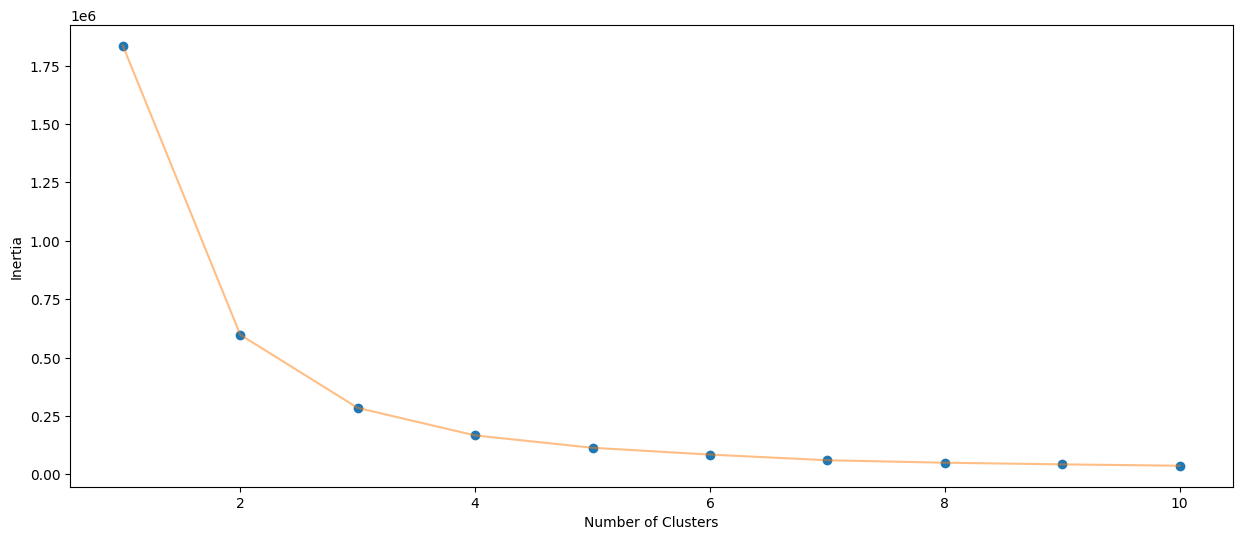

In [47]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

Parace que a partir del 5 ya no hay progresión

In [48]:
algorithm = (KMeans(n_clusters = 5 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X1)
labels2 = algorithm.labels_
centroids2 = algorithm.cluster_centers_ # Obtenemos los centroides

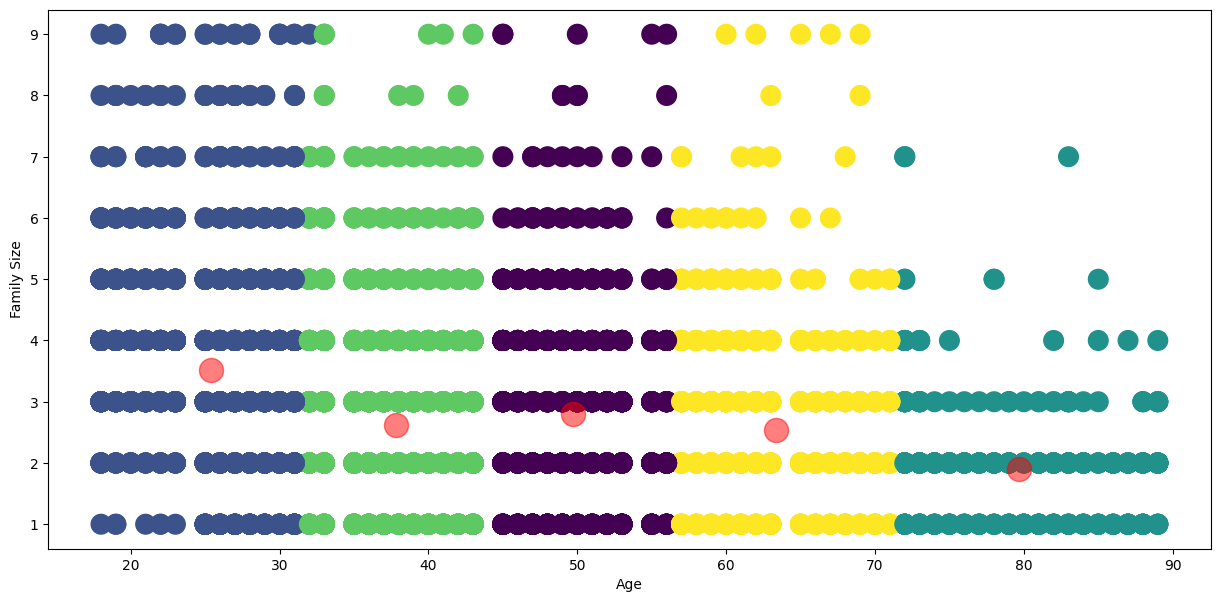

In [49]:
plt.figure(1 , figsize = (15 , 7) )


plt.scatter( x = 'Age' ,y = 'Family_Size' , data = df , c = labels2 , 
            s = 200 )
plt.scatter(x = centroids2[: , 0] , y =  centroids2[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Family Size') , plt.xlabel('Age')
plt.show()

##### Comparativa Clustering

In [58]:
def train_and_evaluate_unsupervised_models(X):
    # Crear una lista de modelos con sus nombres
    models = [
        ('K-Means', KMeans(n_clusters=4)),
        ('Hierarchical Clustering', AgglomerativeClustering(n_clusters=4)),
        ('DBSCAN', DBSCAN(eps=0.5, min_samples=5))
    ]
    
    # Crear una lista para almacenar los resultados
    results = []
    
    # Iterar sobre cada modelo
    for model_name, model in models:
        # Entrenar el modelo
        model.fit(X)
        
        # Obtener las etiquetas de los clústeres
        labels = model.labels_
        
        # Calcular la puntuación de silueta para evaluar la calidad del clustering
        silhouette_score = metrics.silhouette_score(X, labels)
        
        # Agregar el resultado a la lista
        results.append((model_name, silhouette_score))
    
    # Crear un DataFrame con los resultados
    results_df = pd.DataFrame(results, columns=['Model', 'Silhouette Score'])
    
    return results_df

In [59]:
results = train_and_evaluate_unsupervised_models(X)
print(results)

                     Model  Silhouette Score
0                  K-Means          0.422178
1  Hierarchical Clustering          0.436651
2                   DBSCAN         -0.624042


* El modelo de K-Means ha obtenido una puntuación de silueta de 0.422178. Esto indica que las muestras están relativamente bien agrupadas y separadas dentro de los clústeres, lo que sugiere una buena calidad de agrupamiento.

* El modelo de Clustering Jerárquico ha obtenido una puntuación de silueta de 0.436651. Esto también indica que las muestras están bien agrupadas y separadas dentro de los clústeres, lo que sugiere una buena calidad de agrupamiento similar al modelo de K-Means.

* El modelo de DBSCAN ha obtenido una puntuación de silueta de -0.624042. Un valor negativo de la puntuación de silueta sugiere que las muestras están más cerca de los clústeres vecinos que de su propio clúster asignado, lo que indica una calidad de agrupamiento deficiente en este caso.